## 라이브러리

In [1]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt

# Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
# linkage: 계층형 군집분석, dendrogram: 계층구조 나무, cluster: linkage로부터 얻은 값으로 군집 생성
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# 군집 방법 : AgglomerativeClustering(계층형), KMeans(k-평균), DBSCAN
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

# 실루엣(Silhouette) 계수 산출
from sklearn.metrics import silhouette_samples, silhouette_score
# 실루엣 계수 산출 및 시각화 라이브러리 (pip install yellowbrick 실행)
from yellowbrick.cluster import SilhouetteVisualizer
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

import os
os.chdir('/home/piai/실습파일/BigData분석')

In [2]:
# 그래프 한글폰트 적용:맑은 고딕
matplotlib.rc("font", family = "NaNumGothic")
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

# 군집분석_실습

- 붓꽃의 품종 특성 데이터
- 꽃잎 및 꽃받침 길이와 넓이 자료를 이용해서 군집 분석을 실시하고 결과를 해석하시오.

## 1. 데이터 구성

In [3]:
df_raw = pd.read_csv("IRIS.csv", encoding='euc-kr')
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#'setosa' -> 0, 'versicolor' -> 1, 'virginica' -> 2
df_raw['SPECIES']=df_raw['SPECIES'].replace('setosa', 0)
df_raw['SPECIES']=df_raw['SPECIES'].replace('versicolor', 1)
df_raw['SPECIES']=df_raw['SPECIES'].replace('virginica', 2)

df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# 데이터 표준화
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)

# 위에서부터 자료 5개 확인
df_raw_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 , -1.22474487],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 , -1.22474487],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 , -1.22474487],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 , -1.22474487],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 , -1.22474487]])

In [6]:
# 목표 변수:모든 행 & 5번째 열
df_raw_y = df_raw_scaled[:, 4]
# 설명 변수::모든 행 & 5번째 제외한 모든 열
df_raw_x = df_raw_scaled[:,0:3:]

## 2. 계층형 군집분석 실시

#### 2-1. Ward 방법 |

In [7]:
# 연결: ward, 거리 계산: Euclidean: ward~Euclidean
Z_ward = linkage(df_raw_x, method = "ward", metric = "euclidean")
# 연결: average, 거리 계산: Euclidean
Z_average = linkage(df_raw_x, method = "average", metric = "euclidean")

In [8]:
# 군집 생성 결과 확인
Z_ward

array([[0.00000000e+00, 1.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.20000000e+01, 4.50000000e+01, 0.00000000e+00, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.24000000e+02, 1.44000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 0.00000000e+00, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 5.68374269e-02, 2.00000000e+00],
       [7.20000000e+01, 1.46000000e+02, 5.68374269e-02, 2.00000000e+00],
       [7.00000000e+00, 2.60000000e+01, 5.68374269e-02, 2.00000000e+00],
       [1.90000000e+01, 4.60000000e+01, 5.68374269e-02, 2.00000000e+00],
       [5.20000000e+01, 1.41000000e+02, 1.13674854e-01, 2.00000000e+00],
       [2.00000000e+01, 3.10000000e+01, 1.13674854e-01, 2.00000000e+00],
       [6.70000000e+01, 8.20000000e+01, 1.13674854e-01, 2.00000000e+00],
       [7.70000000e+01, 1.45000000e+02, 1.13674854e

Text(0, 0.5, 'Distance')

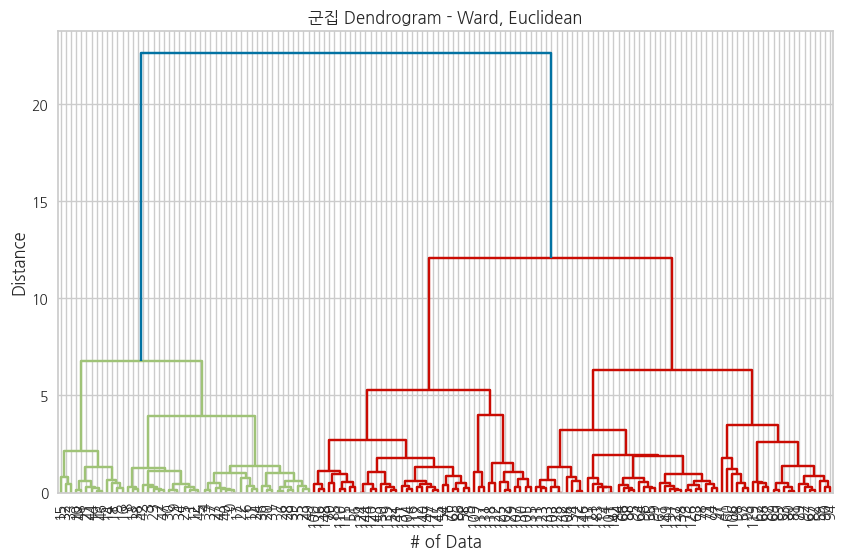

In [9]:
#1) 덴드로그램[연결: ward, 거리 계산: Euclidean]
plt.figure(figsize=(10,6))
ax = plt.subplot(111) 
# DataFrame 변경:Z_ward, Z_average, Z_Minkowski
dendrogram(Z_ward, leaf_font_size=10, orientation= "top")
plt.title("군집 Dendrogram - Ward, Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

Text(0, 0.5, 'Distance')

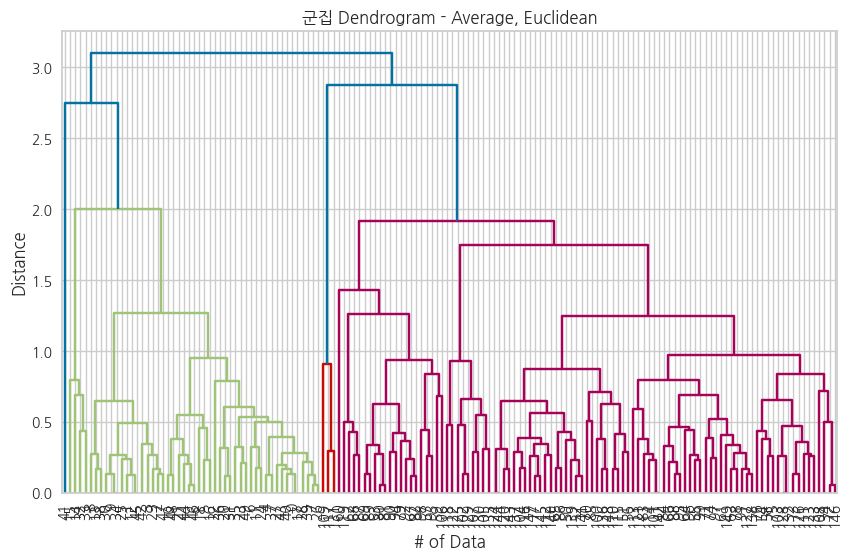

In [10]:
#2) 덴드로그램[연결: average, 거리 계산: Euclidean]
plt.figure(figsize=(10,6))
ax = plt.subplot(111) 
dendrogram(Z_average, leaf_font_size=10, orientation= "top")
plt.title("군집 Dendrogram - Average, Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

- 1, 2 모두 거리 계산 방식은 Euclidean이다.
- 연결 방식은 1번-ward, 2번-average
  
    #### => 서로 다른 형태의 Dendrogram이 생성

In [11]:
# linkage 함수를 통해 얻은 Z_ward 행렬 데이터를 이용하여 군집 생성
cluster_H = fcluster(Z = Z_ward, t = 5, criterion="distance")
# 데이터에 계층형 군집 결과 입력
df_raw["cluster_H"] = cluster_H
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,cluster_H
0,5.1,3.5,1.4,0.2,0,2
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,2
4,5.0,3.6,1.4,0.2,0,2


> 군집 번호 자체는 식별자로 우선순위 등의 의미가 없음

In [12]:
# 집계 함수를 이용한 군집별 데이터 요약
df_summary_H = df_raw.groupby("cluster_H").agg(["min", "mean", "max"])
# 집계 함수를 이용할 경우 열 이름이 두 줄에 걸쳐 나오므로 한 줄로 변환
level0 = df_summary_H.columns.get_level_values(0)
level1 = df_summary_H.columns.get_level_values(1)
df_summary_H.columns = level0 + "_" + level1
df_summary_H.reset_index(inplace = True)
df_summary_H.round(3)

,cluster_H,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max,SPECIES_min,SPECIES_mean,SPECIES_max
0,1,5.1,5.369,5.8,3.7,3.908,4.4,1.2,1.523,1.9,0.1,0.285,0.4,0,0.000,0
1,2,4.3,4.889,5.5,2.9,3.286,3.6,1.0,1.444,1.9,0.1,0.231,0.6,0,0.000,0
2,3,5.9,6.574,7.0,2.8,3.129,3.4,4.4,5.155,6.0,1.3,1.913,2.5,1,1.581,2
3,4,7.1,7.475,7.9,2.6,3.125,3.8,5.8,6.300,6.9,1.6,2.050,2.5,2,2.000,2
4,5,5.4,6.008,6.7,2.5,2.817,3.0,3.6,4.786,5.8,1.2,1.625,2.4,1,1.500,2
5,6,4.5,5.495,6.3,2.0,2.436,2.7,1.3,3.827,5.0,0.3,1.159,1.7,0,1.045,2


> 각 군집 별 변수 분포가 다름-평균과 같은 통계량을 확인해야 함

array([[<Axes: title={'center': 'SEPAL_LENGTH'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'SEPAL_WIDTH'}, xlabel='cluster_H'>],
       [<Axes: title={'center': 'PETAL_LENGTH'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'PETAL_WIDTH'}, xlabel='cluster_H'>]],
      dtype=object)

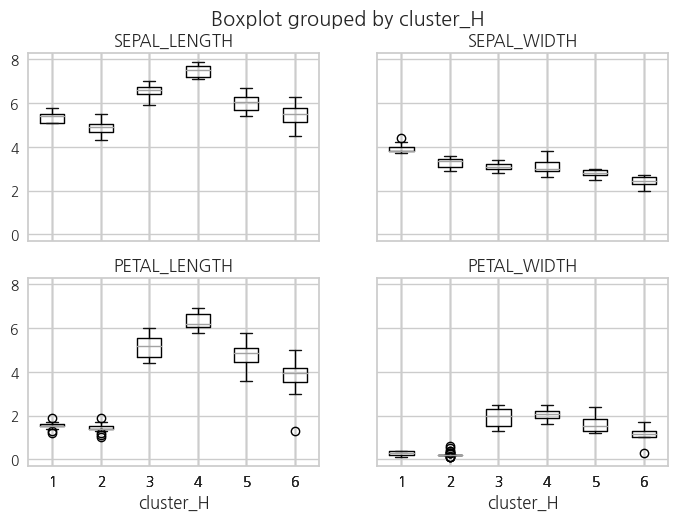

In [13]:
# Boxplot을 활용한 군집별 설명변수 분포
df_raw.boxplot(column=["SEPAL_LENGTH", "SEPAL_WIDTH", "PETAL_LENGTH", "PETAL_WIDTH"]
               , by = "cluster_H")

> 4번 군집은 SEPAL_LENGTH, PETAL_LENGTH의 평균이 상대적으로 높음->목표변수 평균이 높음

<Axes: title={'center': 'SPECIES'}, xlabel='cluster_H'>

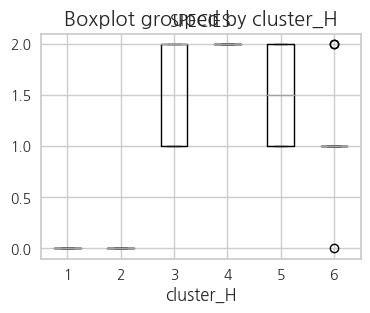

In [14]:
# Boxplot을 활용한 군집별 목표변수 분포
df_raw.boxplot(column=["SPECIES"], by = "cluster_H", figsize=(4,3))

## 4. K-means clustering 실시

#### 4-1. 군집 평가 해석

- sum of square 값이 감소하는 5로 클러스터 개수를 조정하였다.

In [15]:
# 최대 군집 생성 개수
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    
    # 각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
df_error = pd.DataFrame({"NumberofCluster": cluster_range, "Error": clus_error})
df_error.round(3)

,NumberofCluster,Error
0,1,450.000
1,2,190.469
2,3,119.139
3,4,94.641
4,5,75.562
5,6,63.020
6,7,54.304
7,8,46.378
8,9,39.837
9,10,35.328


Text(0, 0.5, 'Sum of Square')

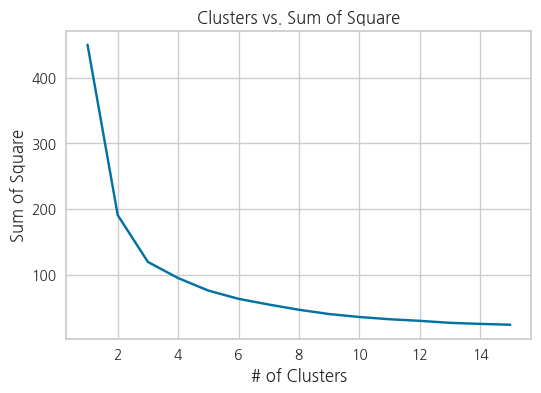

In [16]:
plt.figure(figsize=(6,4))
plt.plot(df_error["NumberofCluster"], df_error["Error"])
plt.title("Clusters vs. Sum of Square")
plt.xlabel("# of Clusters")
plt.ylabel("Sum of Square")

In [17]:
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_KM = [i+1 for i in clus.labels_]
df_raw["cluster_KM"] = cluster_KM
df_raw.head(10)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,cluster_H,cluster_KM
0,5.1,3.5,1.4,0.2,0,2,2
1,4.9,3.0,1.4,0.2,0,2,5
2,4.7,3.2,1.3,0.2,0,2,5
3,4.6,3.1,1.5,0.2,0,2,5
4,5.0,3.6,1.4,0.2,0,2,2
5,5.4,3.9,1.7,0.4,0,1,2
6,4.6,3.4,1.4,0.3,0,2,5
7,5.0,3.4,1.5,0.2,0,2,5
8,4.4,2.9,1.4,0.2,0,2,5
9,4.9,3.1,1.5,0.1,0,2,5


In [18]:
df_summary_KM = df_raw.drop("cluster_H", axis = 1, inplace=False). \
    groupby("cluster_KM").agg(["min", "mean", "max"])
level0 = df_summary_KM.columns.get_level_values(0)
level1 = df_summary_KM.columns.get_level_values(1)
df_summary_KM.columns = level0 + "_" + level1
df_summary_KM.reset_index(inplace = True)
df_summary_KM.round(3)

,cluster_KM,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max,SPECIES_min,SPECIES_mean,SPECIES_max
0,1,6.2,6.885,7.9,2.6,3.133,3.8,4.4,5.562,6.9,1.4,1.992,2.5,1,1.769,2
1,2,4.6,5.248,5.8,3.4,3.712,4.4,1.0,1.468,1.9,0.1,0.272,0.6,0,0.000,0
2,3,5.4,6.019,6.7,2.5,2.840,3.4,3.6,4.714,5.8,1.0,1.576,2.4,1,1.405,2
3,4,4.5,5.470,6.3,2.0,2.400,2.7,1.3,3.850,5.0,0.3,1.200,2.0,0,1.100,2
4,5,4.3,4.775,5.1,2.9,3.179,3.4,1.1,1.463,1.9,0.1,0.217,0.5,0,0.000,0


array([[<Axes: title={'center': 'SEPAL_LENGTH'}, xlabel='cluster_KM'>,
        <Axes: title={'center': 'SEPAL_WIDTH'}, xlabel='cluster_KM'>],
       [<Axes: title={'center': 'PETAL_LENGTH'}, xlabel='cluster_KM'>,
        <Axes: title={'center': 'PETAL_WIDTH'}, xlabel='cluster_KM'>]],
      dtype=object)

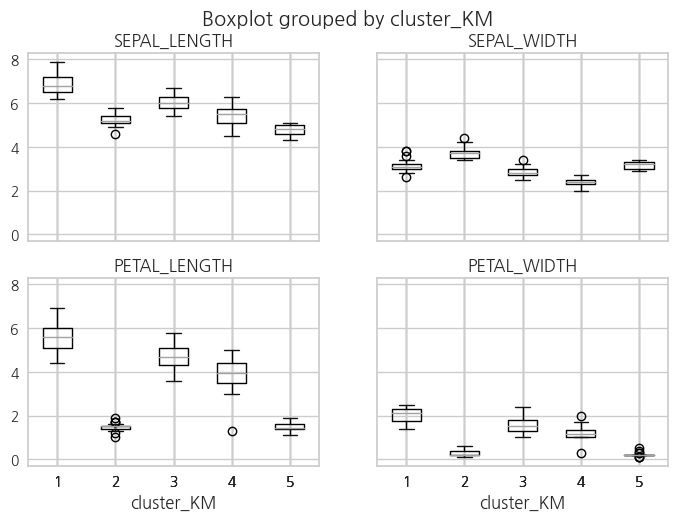

In [19]:
# Boxplot을 활용한 군집별 설명변수 분포
df_raw.boxplot(column=["SEPAL_LENGTH", "SEPAL_WIDTH", "PETAL_LENGTH", "PETAL_WIDTH"]
               , by = "cluster_KM")

> 3번 군집 "SEPAL_LENGTH" 평균이 상대적으로 높음->목표 변수 평균이 높음

<Axes: title={'center': 'SPECIES'}, xlabel='cluster_KM'>

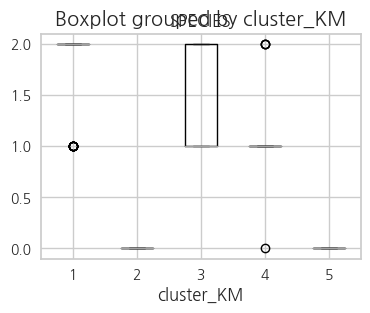

In [20]:
# Boxplot을 활용한 군집별 목표변수 분포
df_raw.boxplot(column=["SPECIES"], by = "cluster_KM", figsize=(4,3))

In [21]:
# scipy.cluster.hierarchy의 계층형 군집분석은 실루엣 계수 산출 안됨
# 실루엣 계수 산출:sklearn.AgglomerativeClustering(계층형군집분석)
cls_h = AgglomerativeClustering(n_clusters=3).fit_predict(df_raw_x)  # 군집 수 =3
sil_score = silhouette_score(df_raw_x, cls_h, metric='euclidean')
print( "계층형(군집 수=3) 실루엣 계수 = ",format(round(sil_score,3)))

cls_h = AgglomerativeClustering(n_clusters=4).fit_predict(df_raw_x)  # 군집 수 =4
sil_score = silhouette_score(df_raw_x, cls_h, metric='euclidean')
print( "계층형(군집 수=4) 실루엣 계수 = ",format(round(sil_score,3)))

계층형(군집 수=3) 실루엣 계수 =  0.462
계층형(군집 수=4) 실루엣 계수 =  0.419


In [22]:
# 실루엣 계수 산출:sklearn.KMeans(k평균군집분석)
cls_k = KMeans(3).fit_predict(df_raw_x)  # 군집 수 =3
sil_score = silhouette_score(df_raw_x, cls_k)
print( "k-평균(군집 수=3) 실루엣 계수 = ",format(round(sil_score,3)))

cls_k = KMeans(4).fit_predict(df_raw_x)  # 군집 수 =4
sil_score = silhouette_score(df_raw_x, cls_k)
print( "k-평균(군집 수=4) 실루엣 계수 = ",format(round(sil_score,3)))

k-평균(군집 수=3) 실루엣 계수 =  0.459
k-평균(군집 수=4) 실루엣 계수 =  0.406


- 실루엣 계수가 높을수록(1에 가까울수록) 군집이 효율적으로 형성되었다고 판단됨.
  - 군집 개수는 계층형, k평균 둘 다 3개가 적절해 보임.


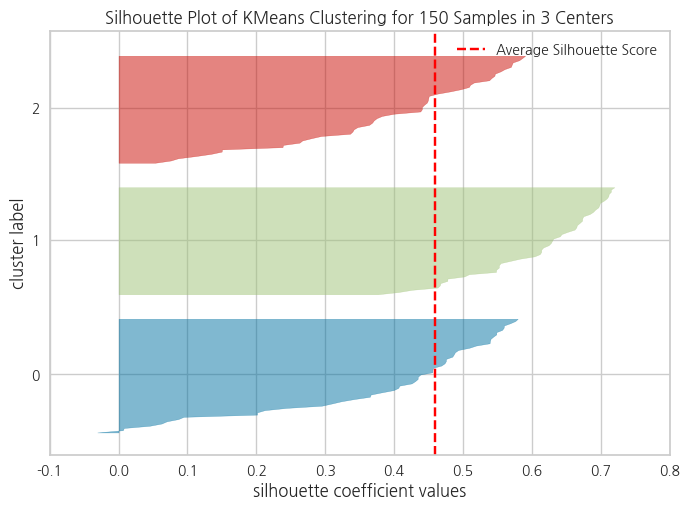

실루엣 계수 =  0.4594


In [23]:
# yellowbrick 라이브러리의 SilhouetteVisualizer 이용

clus = KMeans(3)
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')

#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

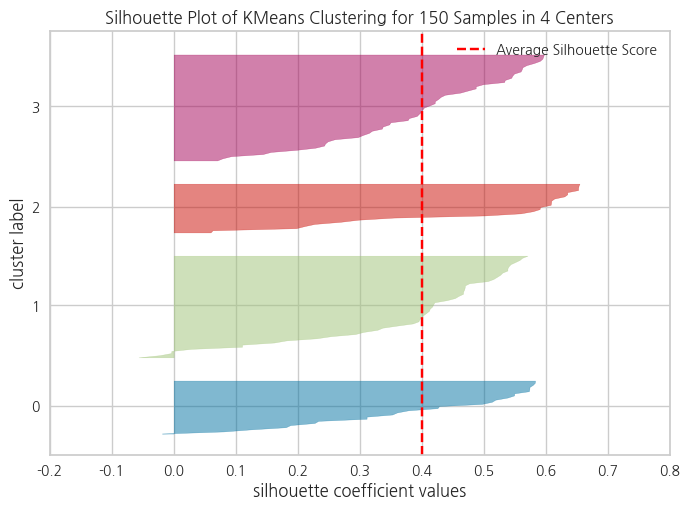

실루엣 계수 =  0.4008


In [24]:
clus = KMeans(4)

#visualizer 생성
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

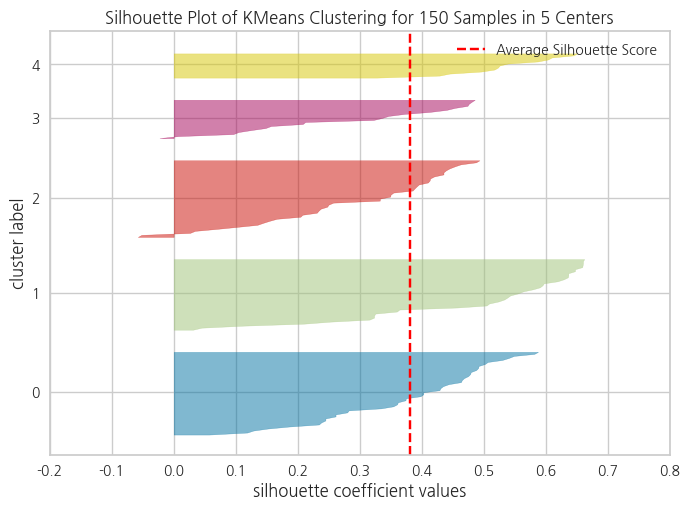

실루엣 계수 =  0.3807


In [25]:
clus = KMeans(5)

#visualizer 생성
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

# 연관규칙_실습

In [26]:
!pip install apriori

In [27]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 전처리 : 항목 값에 대한 index 생성
from mlxtend.preprocessing import TransactionEncoder
# 지지도 계산
from mlxtend.frequent_patterns import apriori
# 연관 규칙
from mlxtend.frequent_patterns import association_rules

# 1. 데이터 구성하기

In [32]:
#df_raw = pd.read_csv("/home/piai/0. 포빅아/3주차/01 실습파일/2. Big Data 분석/구매이력.csv", encoding='euc-kr')
df_raw = pd.read_csv("구매이력.csv", encoding='euc-kr')
df_raw.head(10)

,ID,PRODUCT
0,CS-102,양주
1,CS-102,양주
2,CS-103,소다
3,CS-103,크래커
4,CS-103,맥주
5,CS-104,크래커
6,CS-104,맥주
7,CS-106,양주
8,CS-106,크래커
9,CS-107,맥주


In [33]:
# 고객 ID 리스트 행성 및 정렬
ID = list(set(df_raw["ID"]))
ID.sort()

# 고객ID별 상품 매칭
list_association = []
for i in ID:
    # ID별 구매 데이터 추출
    tmp_list = list(df_raw[df_raw["ID"] == i]["PRODUCT"])
    tmp_list.sort()
    # ID별 구매 데이터를 리스트에 담기
    list_association.append(tmp_list)

# 리스트 출력
for row in list_association:
    print(row)

['양주', '양주']
['맥주', '소다', '크래커']
['맥주', '크래커']
['양주', '크래커']
['맥주', '콜라']
['맥주']
['맥주', '소다', '양주', '크래커']
['맥주']
['맥주', '콜라']
['맥주', '콜라']
['맥주', '양주', '콜라']
['맥주', '소다', '양주', '크래커']
['양주']
['맥주', '콜라']
['양주', '콜라']
['맥주', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주', '소다']
['소다', '양주', '크래커']
['크래커']
['양주', '콜라']
['맥주', '소다', '양주', '콜라', '크래커']
['양주', '콜라']
['맥주', '크래커']
['맥주', '소다', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주']
['맥주', '콜라']
['양주', '콜라', '크래커']
['맥주', '콜라']
['맥주', '크래커']
['맥주']
['맥주', '소다', '양주', '크래커']
['맥주', '소다', '콜라']
['맥주', '콜라', '크래커']
['맥주', '양주']
['맥주', '콜라']
['맥주', '크래커']
['맥주', '소다', '양주', '크래커']
['소다', '양주', '콜라']
['맥주', '크래커']
['소다', '크래커']


데이터 전처리(Encoding)

In [34]:
# Items 기준으로 포함 여부에 따라 True/False로 변환
enc = TransactionEncoder()
df_raw_enc = enc.fit_transform(X=list_association)

# 함수 fit_transform는 데이터를 행렬의 형태로 반환, pandas의 DataFrame의 형태로 변환
df_asso = pd.DataFrame(df_raw_enc, columns=enc.columns_)
df_asso.head()

,맥주,소다,양주,콜라,크래커
0,False,False,True,False,False
1,True,True,False,False,True
2,True,False,False,False,True
3,False,False,True,False,True
4,True,False,False,True,False


# 2. 연관규칙 분석

- 장바구니 ID 별 구매 항목 데이터
- 장바구니 분석을 실시하고 결과를 해석하시오.

In [35]:
df_freq

NameError: name 'df_freq' is not defined

In [36]:
# 규칙 선택 최소 지지도(지지도 % 이상)
v_min_support = 0.25

# 연관규칙 생성 및 지지도 임계값 적용
df_freq = apriori(df_asso, min_support = v_min_support, use_colnames=True)

# itemsets 항목 확인
df_freq.round(3)

,support,itemsets
0,0.744,(맥주)
1,0.349,(소다)
2,0.442,(양주)
3,0.372,(콜라)
4,0.512,(크래커)
5,0.279,"(맥주, 소다)"
6,0.256,"(맥주, 콜라)"
7,0.395,"(맥주, 크래커)"
8,0.279,"(크래커, 소다)"
9,0.256,"(크래커, 양주)"


#### 지지도가 0.25 이상인 데이터들을 보임
- "맥주" 구매 고객 비율: 0.744
- "크래커, 맥주" 구매 고객 비율: 0.395
- "소다, 맥주" 구매 고객 비율: 0.279

#### 기준 metric: 지지도(support)/신뢰도(confidence)/향상도(lift) 임계값: 기준 metric의 최소값

In [37]:
# 향상도 기준: lift
df_asso_rule = association_rules(df_freq, metric="lift", min_threshold=1.3)
df_asso_rule.round(3)

# 신뢰도 기준: confidence
df_asso_rule = association_rules(df_freq, metric="confidence", min_threshold=0.7)
df_asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(소다),(맥주),0.349,0.744,0.279,0.800,1.075,0.019,1.279,0.107
1,(크래커),(맥주),0.512,0.744,0.395,0.773,1.038,0.015,1.126,0.076
2,(소다),(크래커),0.349,0.512,0.279,0.800,1.564,0.101,2.442,0.554


# 3. 결론 도출

#### 맥주를 구매한 고객에게 크래커와 소다 중 어떤 것을 추천할 것인가?
- 지지도(support) 기준: 크래커 추천(0.395), 소다는 0.279
- 신뢰도(confidence) 기준: 소다 추천(0.8), 크래커는 0.773
- 향상도(lift) 기준: 소다 추천(1.075), 크래커는 1.038